In [1]:
def read_log(path: str) -> dict:
    with open(path, 'r') as file:
        logs = file.read().splitlines()
    res = {
        'timestep': [],
        'reward': [],
    }
    for line in logs:
        _, timestep, reward = line.split()
        res['timestep'].append(int(timestep))
        res['reward'].append(float(reward))
    return res

dqn = read_log('../dqn-breakout/rewards.txt')
ddqn = read_log('rewards.txt')

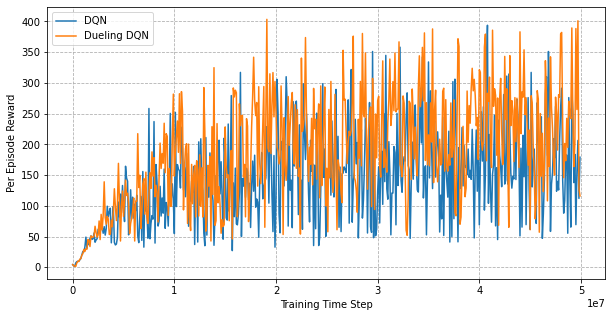

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dqn['timestep'], dqn['reward'], label='DQN')
plt.plot(ddqn['timestep'], ddqn['reward'], label='Dueling DQN')
plt.xlabel('Training Time Step')
plt.ylabel('Per Episode Reward')
plt.legend()
plt.grid(ls='--')
plt.show()

平滑一下数据试试。

In [3]:
import numpy as np

def smooth(a,WSZ): 
    # a: NumPy 1-D array containing the data to be smoothed 
    # WSZ: smoothing window size needs, which must be odd number, 
    # as in the original MATLAB implementation 
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ  
    r = np.arange(1,WSZ-1,2) 
    start = np.cumsum(a[:WSZ-1])[::2]/r 
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1] 
    return np.concatenate(( start , out0, stop ))

dqn['reward'] = smooth(dqn['reward'], 5)
ddqn['reward'] = smooth(ddqn['reward'], 5)

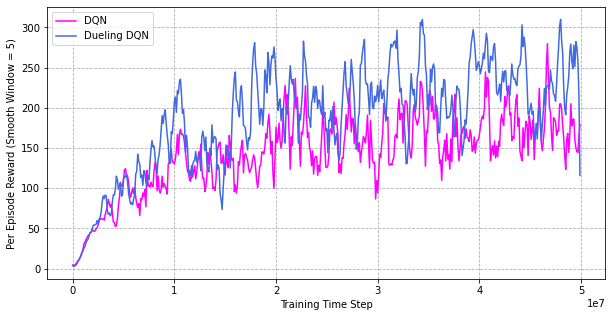

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dqn['timestep'], dqn['reward'], label='DQN', color='magenta')
plt.plot(ddqn['timestep'], ddqn['reward'], label='Dueling DQN', color='royalblue')
plt.xlabel('Training Time Step')
plt.ylabel('Per Episode Reward (Smooth Window = 5)')
plt.legend()
plt.grid(ls='--')
plt.show()